In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # setting seaborn default for plots



%matplotlib inline

In [155]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [156]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [157]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass. <br>
* Continous: Age, Fare. <br>
* Discrete: SibSp, Parch. <br>

In [158]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [160]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [161]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Visualization

In [163]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [164]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

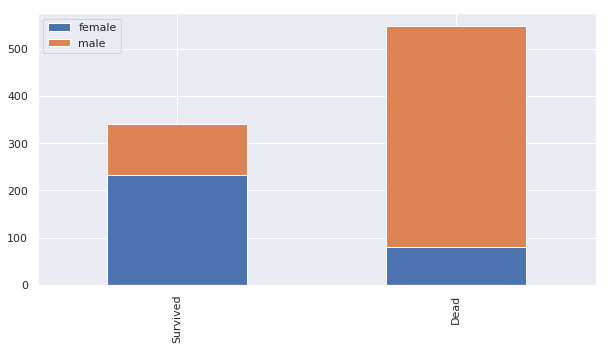

In [165]:
bar_chart('Sex')

In [166]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


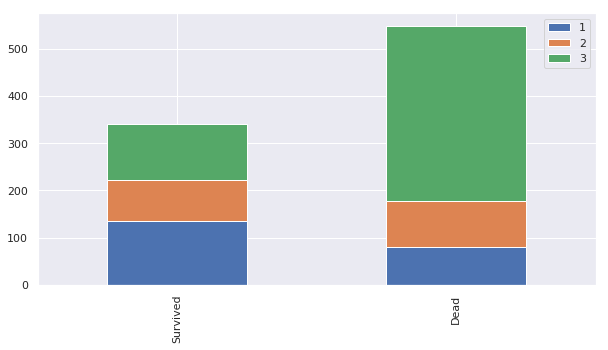

In [167]:
bar_chart('Pclass')

In [168]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [169]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [170]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


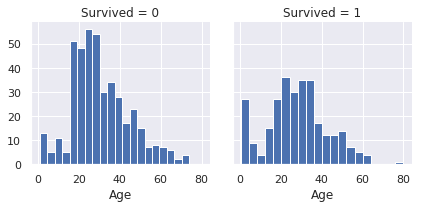

In [171]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Feature engineering

## Name

In [172]:
train_test_data = [train_df, test_df] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Sir           1
Countess      1
Mme           1
Don           1
Lady          1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [173]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [174]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

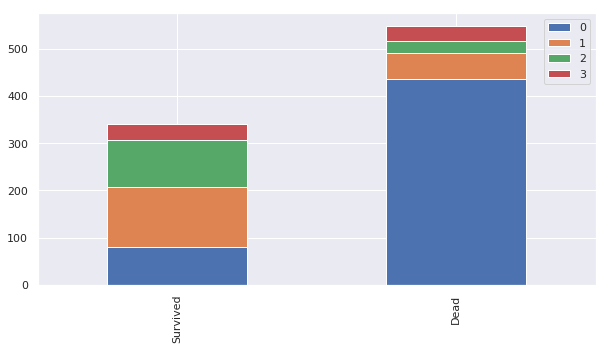

In [175]:
bar_chart('Title')

# Data Preprocessing

In [176]:
X_train_df = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
X_test_df = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [177]:
y_train_df = train_df['Survived']
y_test_df = test_df['PassengerId']

In [178]:
X_train_df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [179]:
X_test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [180]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [181]:
X_train_df['Age'] = X_train_df[['Age','Pclass']].apply(impute_age,axis=1)
X_test_df['Age'] = X_test_df[['Age','Pclass']].apply(impute_age,axis=1)

In [182]:
def Age_cat(x):
    if x <=4 :
        return 1
    elif x>4 and x<=14:
        return 2
    elif x>14 and x<=30:
        return 3
    else:
        return 4

In [183]:
X_train_df['Age'] = X_train_df['Age'].apply(Age_cat)
X_test_df['Age'] = X_test_df['Age'].apply(Age_cat)

In [184]:
X_train_df.Age.unique()

array([3, 4, 1, 2])

In [185]:
X_train_df['With_someone'] = X_train_df['SibSp'] | X_train_df['Parch']
X_test_df['With_someone'] = X_test_df['SibSp'] | X_test_df['Parch']
X_train_df['Family'] = X_train_df['SibSp'] + X_train_df['Parch']+1
X_test_df['Family'] = X_test_df['SibSp'] + X_test_df['Parch']+1

In [186]:
X_train_df['With_someone'] =X_train_df['With_someone'].apply(lambda x:1 if x >=1 else 0)
X_test_df['With_someone'] =X_test_df['With_someone'].apply(lambda x:1 if x >=1 else 0)

In [187]:
X_train_df['With_someone'].unique()

array([1, 0])

In [188]:
X_train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,With_someone,Family
0,3,male,3,1,0,7.2500,S,0,1,2
1,1,female,4,1,0,71.2833,C,2,1,2
2,3,female,3,0,0,7.9250,S,1,0,1
3,1,female,4,1,0,53.1000,S,2,1,2
4,3,male,4,0,0,8.0500,S,0,0,1


In [189]:
mod = X_train_df.Embarked.value_counts().argmax()
X_train_df.Embarked.fillna(mod, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


In [190]:
fare_med = train_df.Fare.median()
X_test_df.Fare.fillna(fare_med, inplace=True)

In [191]:
X_train_df.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
With_someone    0
Family          0
dtype: int64

In [192]:
X_test_df.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
With_someone    0
Family          0
dtype: int64

# Lable Encoding

In [193]:
X_train_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'With_someone', 'Family'],
      dtype='object')

In [194]:
X_train_df.replace({"male": 0, "female": 1}, inplace=True)
X_test_df.replace({"male": 0, "female": 1}, inplace=True)
X_train_df.replace({"S": 0, "C": 1, "Q": 2}, inplace=True)
X_test_df.replace({"S": 0, "C": 1, "Q": 2}, inplace=True)

In [195]:
X_train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,With_someone,Family
0,3,0,3,1,0,7.2500,0,0,1,2
1,1,1,4,1,0,71.2833,1,2,1,2
2,3,1,3,0,0,7.9250,0,1,0,1
3,1,1,4,1,0,53.1000,0,2,1,2
4,3,0,4,0,0,8.0500,0,0,0,1


# OneHot Encoding

In [196]:
X_train_df = pd.get_dummies(X_train_df, columns=['Pclass', 'Embarked','Age','Title'], drop_first=True)
X_test_df = pd.get_dummies(X_test_df, columns=['Pclass', 'Embarked','Age','Title'], drop_first=True)
X_train_df.head()

,Sex,SibSp,Parch,Fare,With_someone,Family,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Age_2,Age_3,Age_4,Title_1,Title_2,Title_3
0,0,1,0,7.2500,1,2,0,1,0,0,0,1,0,0,0,0
1,1,1,0,71.2833,1,2,0,0,1,0,0,0,1,0,1,0
2,1,0,0,7.9250,0,1,0,1,0,0,0,1,0,1,0,0
3,1,1,0,53.1000,1,2,0,0,0,0,0,0,1,0,1,0
4,0,0,0,8.0500,0,1,0,1,0,0,0,0,1,0,0,0


In [197]:
X_train_df = X_train_df.drop(columns=['SibSp','Parch'])
X_test_df = X_test_df.drop(columns=['SibSp','Parch'])

In [198]:
X_train_df.shape, X_test_df.shape

((891, 14), (418, 14))

## Data Scaling

In [199]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train_df[['Fare','Family']] = sc_X.fit_transform(X_train_df[['Fare','Family']])
X_test_df[['Fare','Family']] = sc_X.transform(X_test_df[['Fare','Family']])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [200]:
X_train_df.head()

,Sex,Fare,With_someone,Family,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Age_2,Age_3,Age_4,Title_1,Title_2,Title_3
0,0,0.014151,1,0.1,0,1,0,0,0,1,0,0,0,0
1,1,0.139136,1,0.1,0,0,1,0,0,0,1,0,1,0
2,1,0.015469,0,0.0,0,1,0,0,0,1,0,1,0,0
3,1,0.103644,1,0.1,0,0,0,0,0,0,1,0,1,0
4,0,0.015713,0,0.0,0,1,0,0,0,0,1,0,0,0


# Algorithms Training

In [201]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [202]:
logi_clf = LogisticRegression(random_state=0)
logi_parm = {"penalty": ['l1', 'l2'], "C": [0.1, 0.5, 1, 5, 10, 50]}

svm_clf = SVC(random_state=0)
svm_parm = {'kernel': ['rbf', 'poly'], 'C': [0.1, 0.5, 1, 5, 10, 50], 'degree': [3, 5, 7], 
            'gamma': ['auto', 'scale']}

dt_clf = DecisionTreeClassifier(random_state=0)
dt_parm = {'criterion':['gini', 'entropy']}

knn_clf = KNeighborsClassifier()
knn_parm = {'n_neighbors':[5, 10, 15, 20], 'weights':['uniform', 'distance'], 'p': [1,2]}

gnb_clf = GaussianNB()
gnb_parm = {'priors':['None']}

clfs = [logi_clf, svm_clf, dt_clf, knn_clf]
params = [logi_parm, svm_parm, dt_parm, knn_parm] 

In [ ]:
#clf1 = xgb.XGBClassifier()
#clf1.fit(X_train_df,y_train_df)
#rf_rand = GridSearchCV(clf1,{'n_estimators':[50,200,250,300,500],'max_depth':[9],'learning_rate':[0.001,0.01,0.1,1]},cv=10)
#rf_rand.fit(X_train_df,y_train_df)
#print(rf_rand.best_score_)
#print(rf_rand.best_params_)

In [ ]:
#clf2 = SVC()
#clf2.fit(X_train_df,y_train_df)
#gb_rand = GridSearchCV(clf2,{'C':[5],'degree':[3],'random_state':[0,50,100]},cv=10)
#gb_rand.fit(X_train_df,y_train_df)
#print(gb_rand.best_score_)
#print(gb_rand.best_params_)

In [ ]:
#clf3 = RandomForestClassifier()
#clf3.fit(X_train_df,y_train_df)
#svc_rand = GridSearchCV(clf3,{'max_depth':[30],'min_samples_split':[10,12,15],'n_estimators':[500]},cv=10)
#svc_rand.fit(X_train_df,y_train_df)
#print(svc_rand.best_score_)
#print(svc_rand.best_params_)

In [203]:
clf1 = GradientBoostingClassifier(max_depth=4,n_estimators=300,learning_rate=0.01)
clf1.fit(X_train_df,y_train_df)
clf2 = SVC(C=5,degree=3,random_state=0,probability=True)
clf2.fit(X_train_df,y_train_df)
clf3 = RandomForestClassifier(max_depth=30,min_samples_split =15 ,n_estimators=500,random_state=0)
clf3.fit(X_train_df,y_train_df)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [204]:
eclf = VotingClassifier(estimators=[('gb',clf1),('svc',clf2),('rf',clf3)],voting='soft',weights=[2,1,1.5])

In [205]:
eclf.fit(X_train_df,y_train_df)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('gb', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1,...mators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 1, 1.5])

In [206]:
#from mlxtend.classifier import StackingCVClassifier
#stack_gen = StackingCVClassifier(classifiers=(clf1,clf2,clf3,eclf),meta_classifier=eclf,use_features_in_secondary=True)

In [207]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(eclf,X_train_df,y_train_df,cv=10)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [208]:
cv.mean()

0.8338908750425604

In [ ]:
#stack_gen.fit(X_train_df,y_train_df)

In [ ]:
#clfs_opt = []
#clfs_best_scores = []
#clfs_best_param = []
#for clf_, param in zip(clfs, params):
#    clf = RandomizedSearchCV(clf_, param, cv=5)
#    clf.fit(X_train_sc, y_train_df)
#    clfs_opt.append(clf)
#    clfs_best_scores.append(clf.best_score_)
#    clfs_best_param.append(clf.best_params_)

In [ ]:
#max(clfs_best_scores)

In [ ]:
#arg = np.argmax(clfs_best_scores)
#clfs_best_param[arg]

In [ ]:
#clf = clfs_opt[arg]

In [ ]:
#pred = clf.predict(X_test_sc)

In [ ]:
#Grad_clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
#Grad_clf.fit(X_train_df,y_train_df)

In [ ]:
#rand = RandomizedSearchCV(Grad_clf,{'learning_rate':[0.01,0.1,1],'max_depth':[1,5,10],
                                    #'n_estimators':[50,100,200,500]},n_iter=15,cv=10)

In [ ]:
#rand.fit(X_train_df,y_train_df)

In [ ]:
#print(rand.best_score_)
#print(rand.best_params_)


In [ ]:
#Grad_clf = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,max_depth=5)
#Grad_clf.fit(X_train_df,y_train_df)

In [ ]:
pred = eclf.predict(X_test_df)

In [ ]:
cols = ['PassengerId', 'Survived']
submit_df = pd.DataFrame(np.hstack((y_test_df.values.reshape(-1,1),pred.reshape(-1,1))), 
                         columns=cols)

In [ ]:
submit_df.to_csv('submission.csv', index=False)

In [ ]:
submit_df.head()